**Importing** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set(style="whitegrid")

**Reading the data**

In [ ]:
# Load the dataset
df = pd.read_csv('gemstone.csv(1).csv')

# Display the first few rows of the dataset
df.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,NaN,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [ ]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    187966 non-null  float64
 6   table    193573 non-null  float64
 7   x        192343 non-null  float64
 8   y        192584 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [ ]:
df.isnull().sum()

,0
id,0
carat,0
cut,0
color,0
clarity,0
depth,5607
table,0
x,1230
y,989
z,0


In [ ]:
# summary of statistics for the numerical columns
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,187966.000000,193573.000000,192343.000000,192584.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.839086,57.227675,5.715282,5.720095,3.534246,3969.155414
std,55879.856166,0.462688,1.092317,1.918844,1.112964,1.105160,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.730000,3.530000,2401.000000
75%,145179.000000,1.030000,62.500000,58.000000,6.520000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [ ]:
#Duplicates check
df.duplicated().sum()

0

**Replacing null numerical columns with mean**

In [ ]:
depth_mean = df['depth'].mean()
df['depth'].fillna(depth_mean, inplace=True)

In [ ]:
x_mean = df['x'].mean()
df['x'].fillna(x_mean, inplace=True)

In [ ]:
y_mean = df['y'].mean()
df['y'].fillna(y_mean, inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0


**Frequency Distribution of Numerical Attributes**

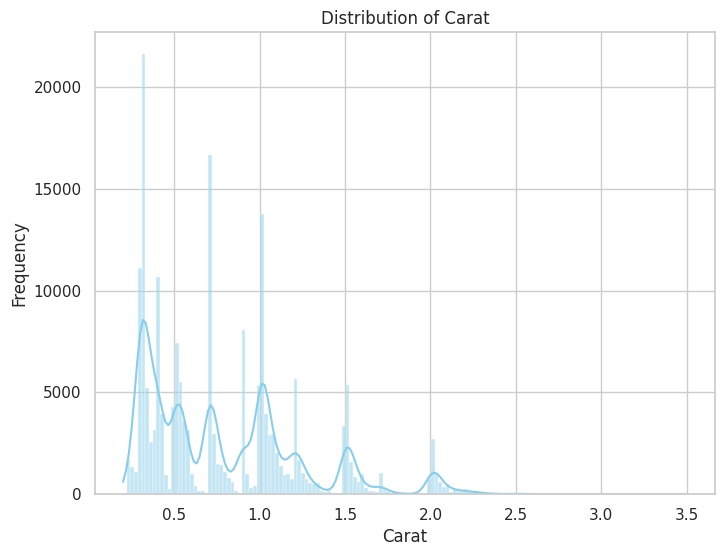

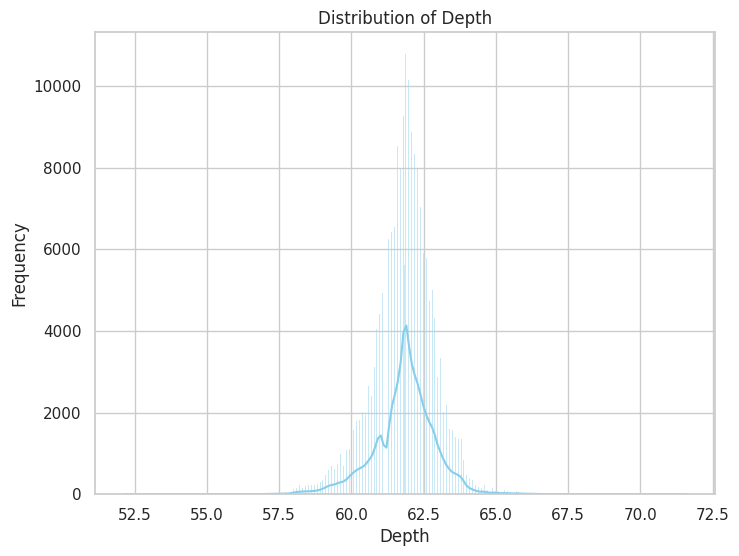

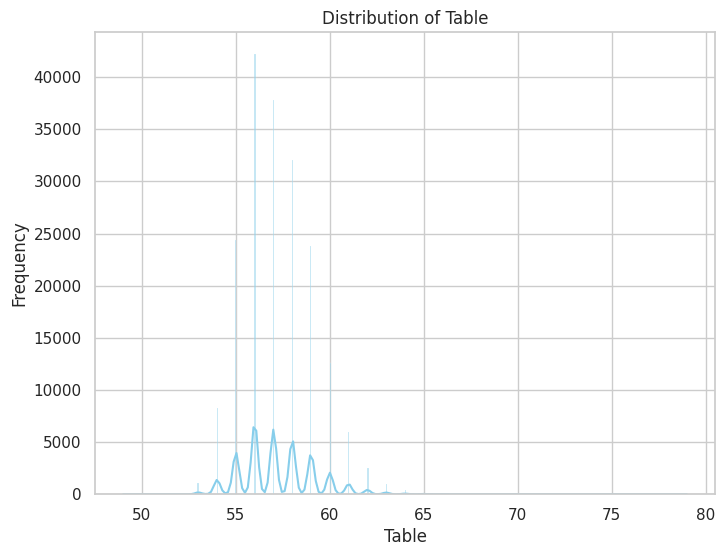

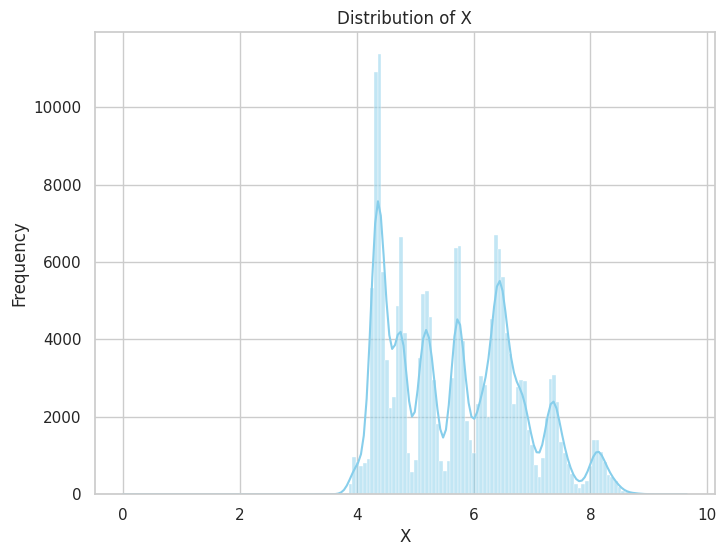

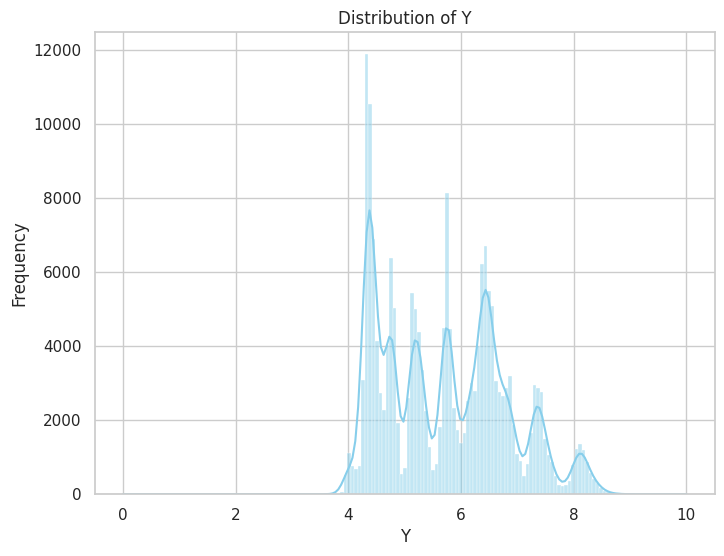

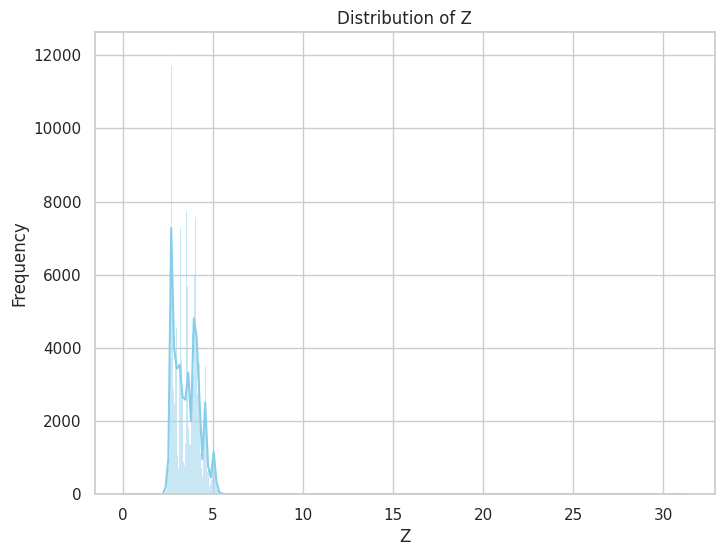

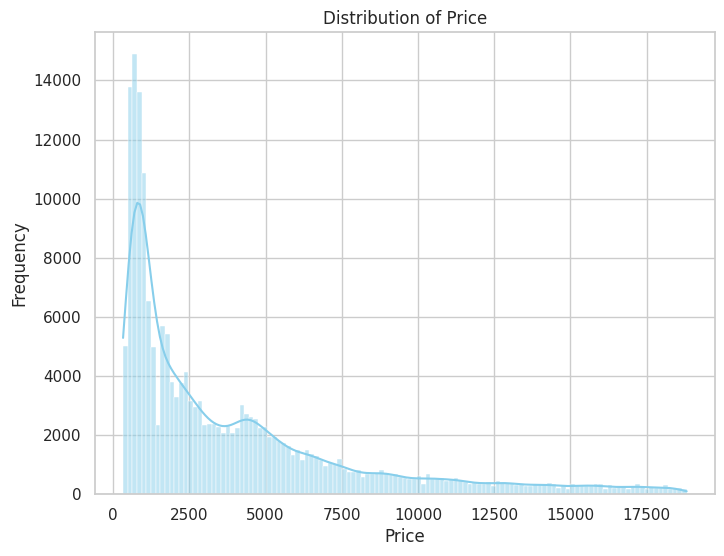

In [ ]:
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()


The distribution of carat weights is right-skewed, with a majority of diamonds having lower carat values and a smaller proportion having higher carat values. This is a typical pattern in diamond datasets, reflecting the higher value and rarity of larger diamonds.

The distribution of Depth is approximately normal, with a mean around 62 and a standard deviation of about 2. Most diamonds have a depth between 60 and 64.

The distribution of Table is approximately normal, with a mean around 57 and a standard deviation of about 2. Most diamonds have a table percentage between 55 and 59.

The distribution of Price is right-skewed, with a long tail towards higher prices. This means that most diamonds are less expensive, and only a few are very expensive

**Countplots of Categorical Attributes**

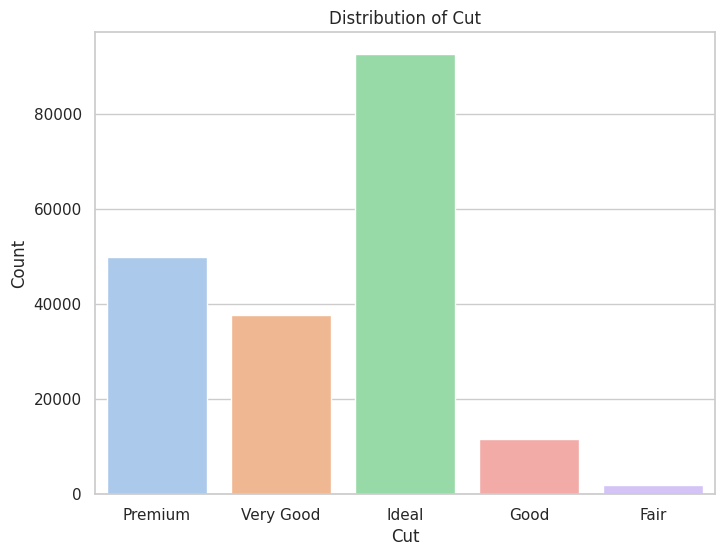

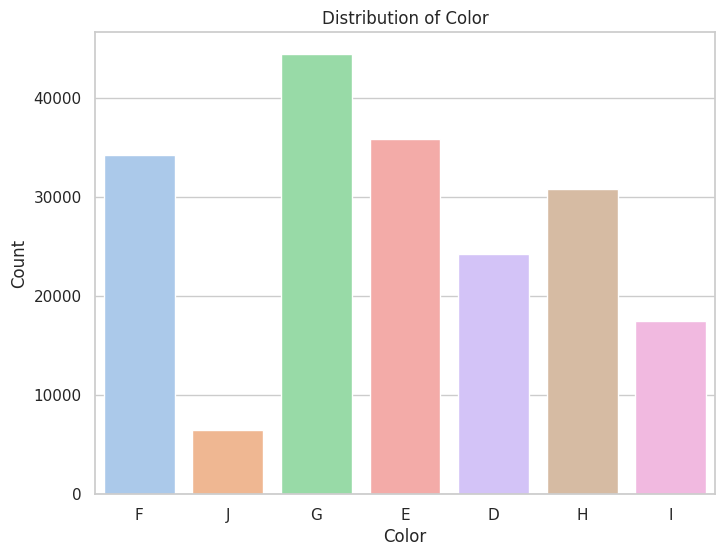

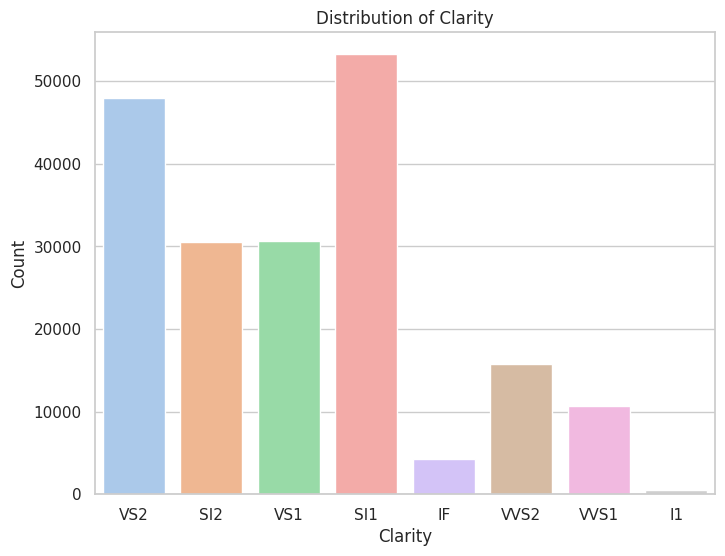

In [ ]:
# Univariate Analysis: Categorical Variables
categorical_columns = ['cut', 'color', 'clarity']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

From the three plots provided:

Cut Distribution: Most diamonds are of the "Ideal" cut, followed by "Premium" and "Very Good." There are fewer diamonds in the "Good" and "Fair" categories. This suggests that high-quality cuts dominate the dataset.

Color Distribution: Diamonds with color grades "G," "E," and "F" are more common, while "J" and "I" are less frequent. This indicates that diamonds with mid-to-high color quality are predominant.

Clarity Distribution: The clarity "SI1" is the most frequent, followed by "VS2" and "VS1." Very high clarity grades like "IF" and "VVS2" are less common, and "I1" is rare.

Conclusion
High-quality cuts ("Ideal"), mid-range colors ("G," "E"), and moderate clarity grades ("SI1," "VS2") are the most common attributes in this dataset. These characteristics are likely to play a significant role in predicting diamond prices.

**Relationship of Target Variable with Independent Variables**

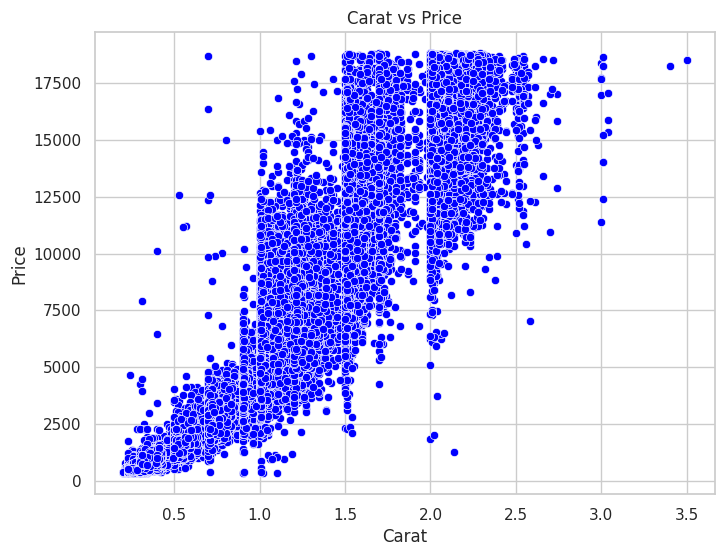

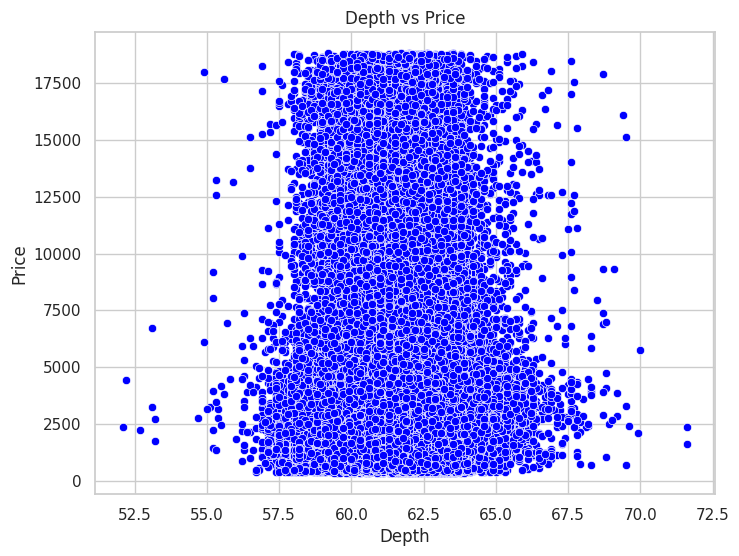

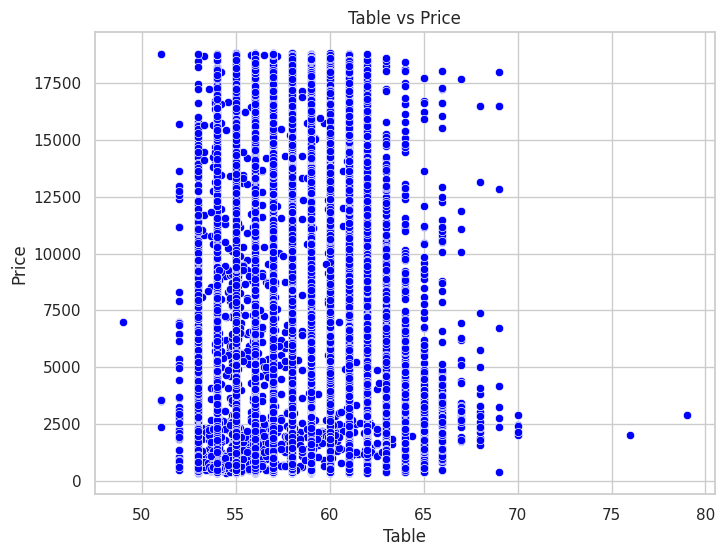

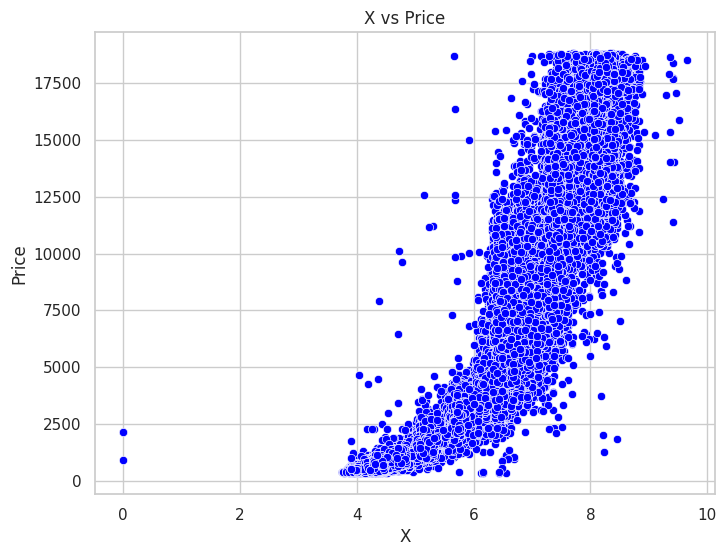

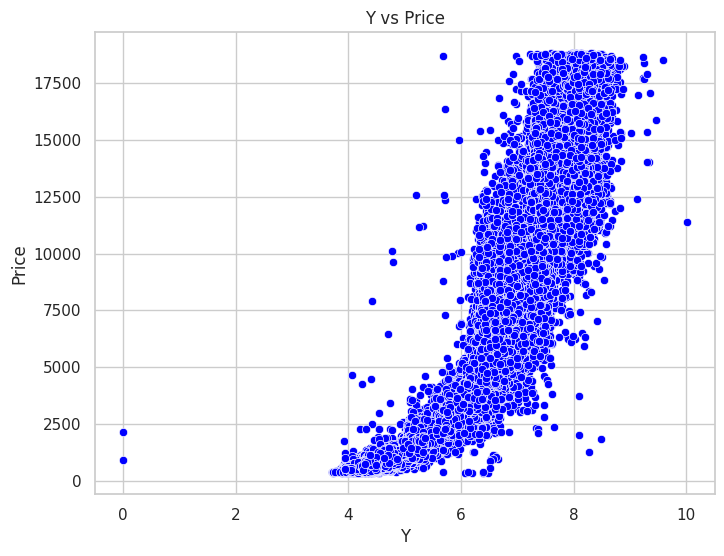

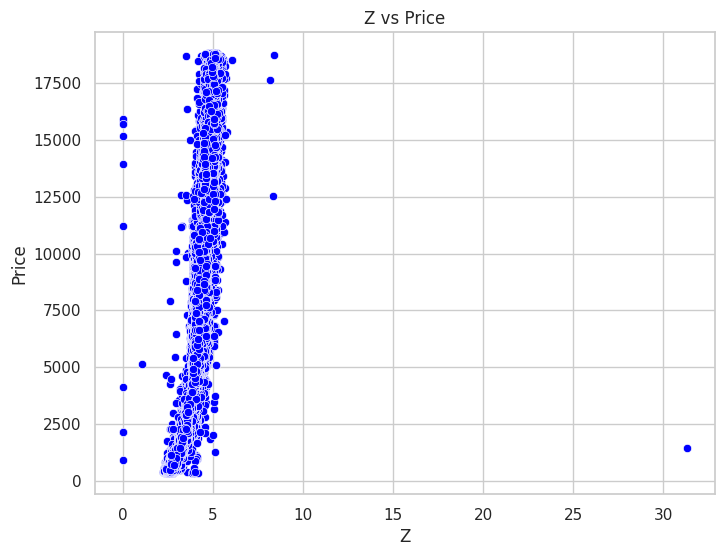

In [ ]:
# Bivariate Analysis: Numerical vs Target Variable (Price)
for col in numerical_columns[:-1]:  # Exclude 'price' since it's the target
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['price'], color='blue')
    plt.title(f'{col.capitalize()} vs Price')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.show()

Carat vs. Price:

There is a clear positive correlation between carat and price, indicating that as the carat size increases, the price also tends to increase.
The data shows significant clustering, especially for specific ranges of carat values, which might reflect common sizes or market preferences.
A few outliers exist with high carat values and relatively lower prices or vice versa.

Depth vs. Price:

There is no strong linear correlation between depth and price. The scatter plot appears to form a dense cloud, with most points concentrated in the mid-depth range (around 58-63%).
Depth alone may not be a strong predictor of diamond price, but there could be other variables interacting with depth to influence the price.
Some outliers exist, but they are not dominant.

Table vs. Price:

Similar to depth, there is no apparent strong linear relationship between table size and price. Most data points are concentrated in the range of 55-65 for the table size.
Some points at extreme table sizes (lower or higher) are less frequent and may be outliers.

X vs Price:

The scatter plot shows a positive correlation between X (likely representing the diamond's length) and Price. As the value of X increases, the price tends to increase, indicating that X is a significant predictor of price.
However, there is variability, suggesting other factors also influence the price.

Y vs Price:

Similarly, the scatter plot of Y (likely the diamond's width) versus Price shows a positive correlation. Higher Y values are generally associated with higher prices.
The relationship is quite similar to X, with comparable variability.

Z vs Price:

For Z (likely the depth of the diamond), the relationship with price appears less linear compared to X and Y. Most data points are concentrated around a specific range of Z values, and the spread is narrower.
There are a few outliers with higher Z values and varying prices, which might need further investigation.

<Axes: xlabel='carat', ylabel='price'>

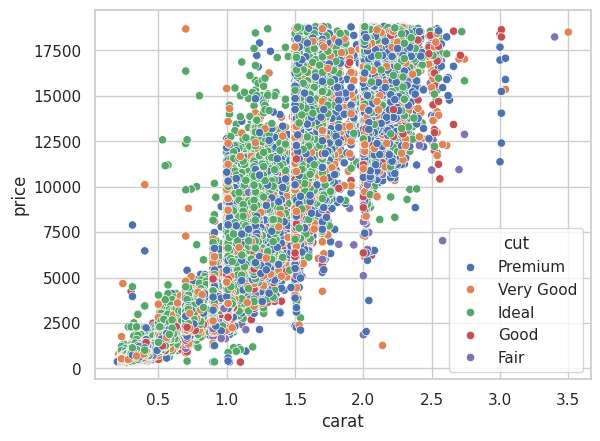

In [ ]:
sns.scatterplot(data=df,x='carat',y='price',hue='cut')

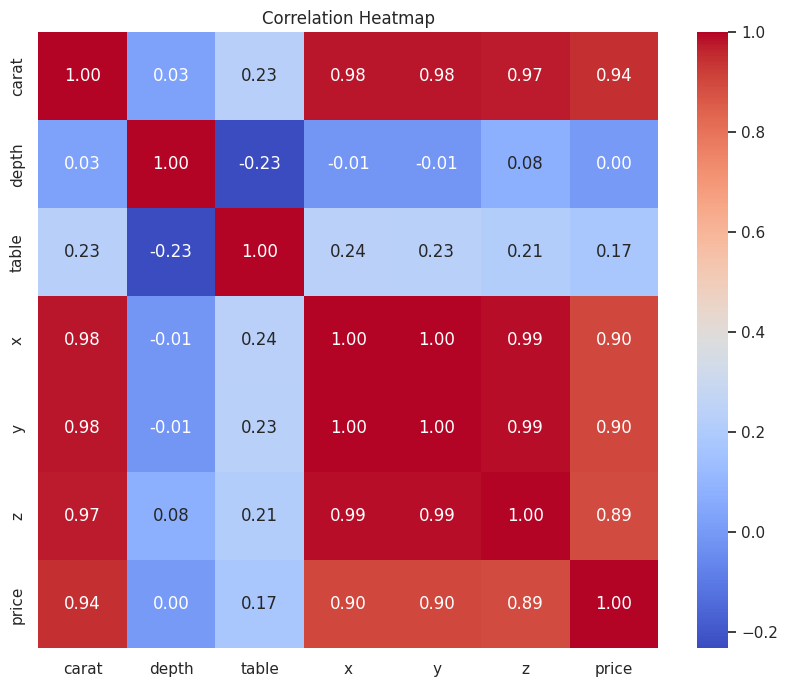

In [ ]:
# Bivariate Analysis: Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows:

Carat and dimensions (
𝑥
x,
𝑦
y,
𝑧
z) strongly correlate with price, with carat being the most significant (
0.94
0.94).
Depth and table have weak or negligible correlations with price.
Dimensions (
𝑥
x,
𝑦
y,
𝑧
z) are highly interrelated, indicating multicollinearity.

Insights:
Carat is the most significant factor influencing price, followed by dimensions.
Depth and table do not strongly impact the price.
Multicollinearity exists among the size-related features (
𝑥
x,
𝑦
y,
𝑧
z), which may require attention in predictive modeling.

**Pairplots of Numerical Columns**

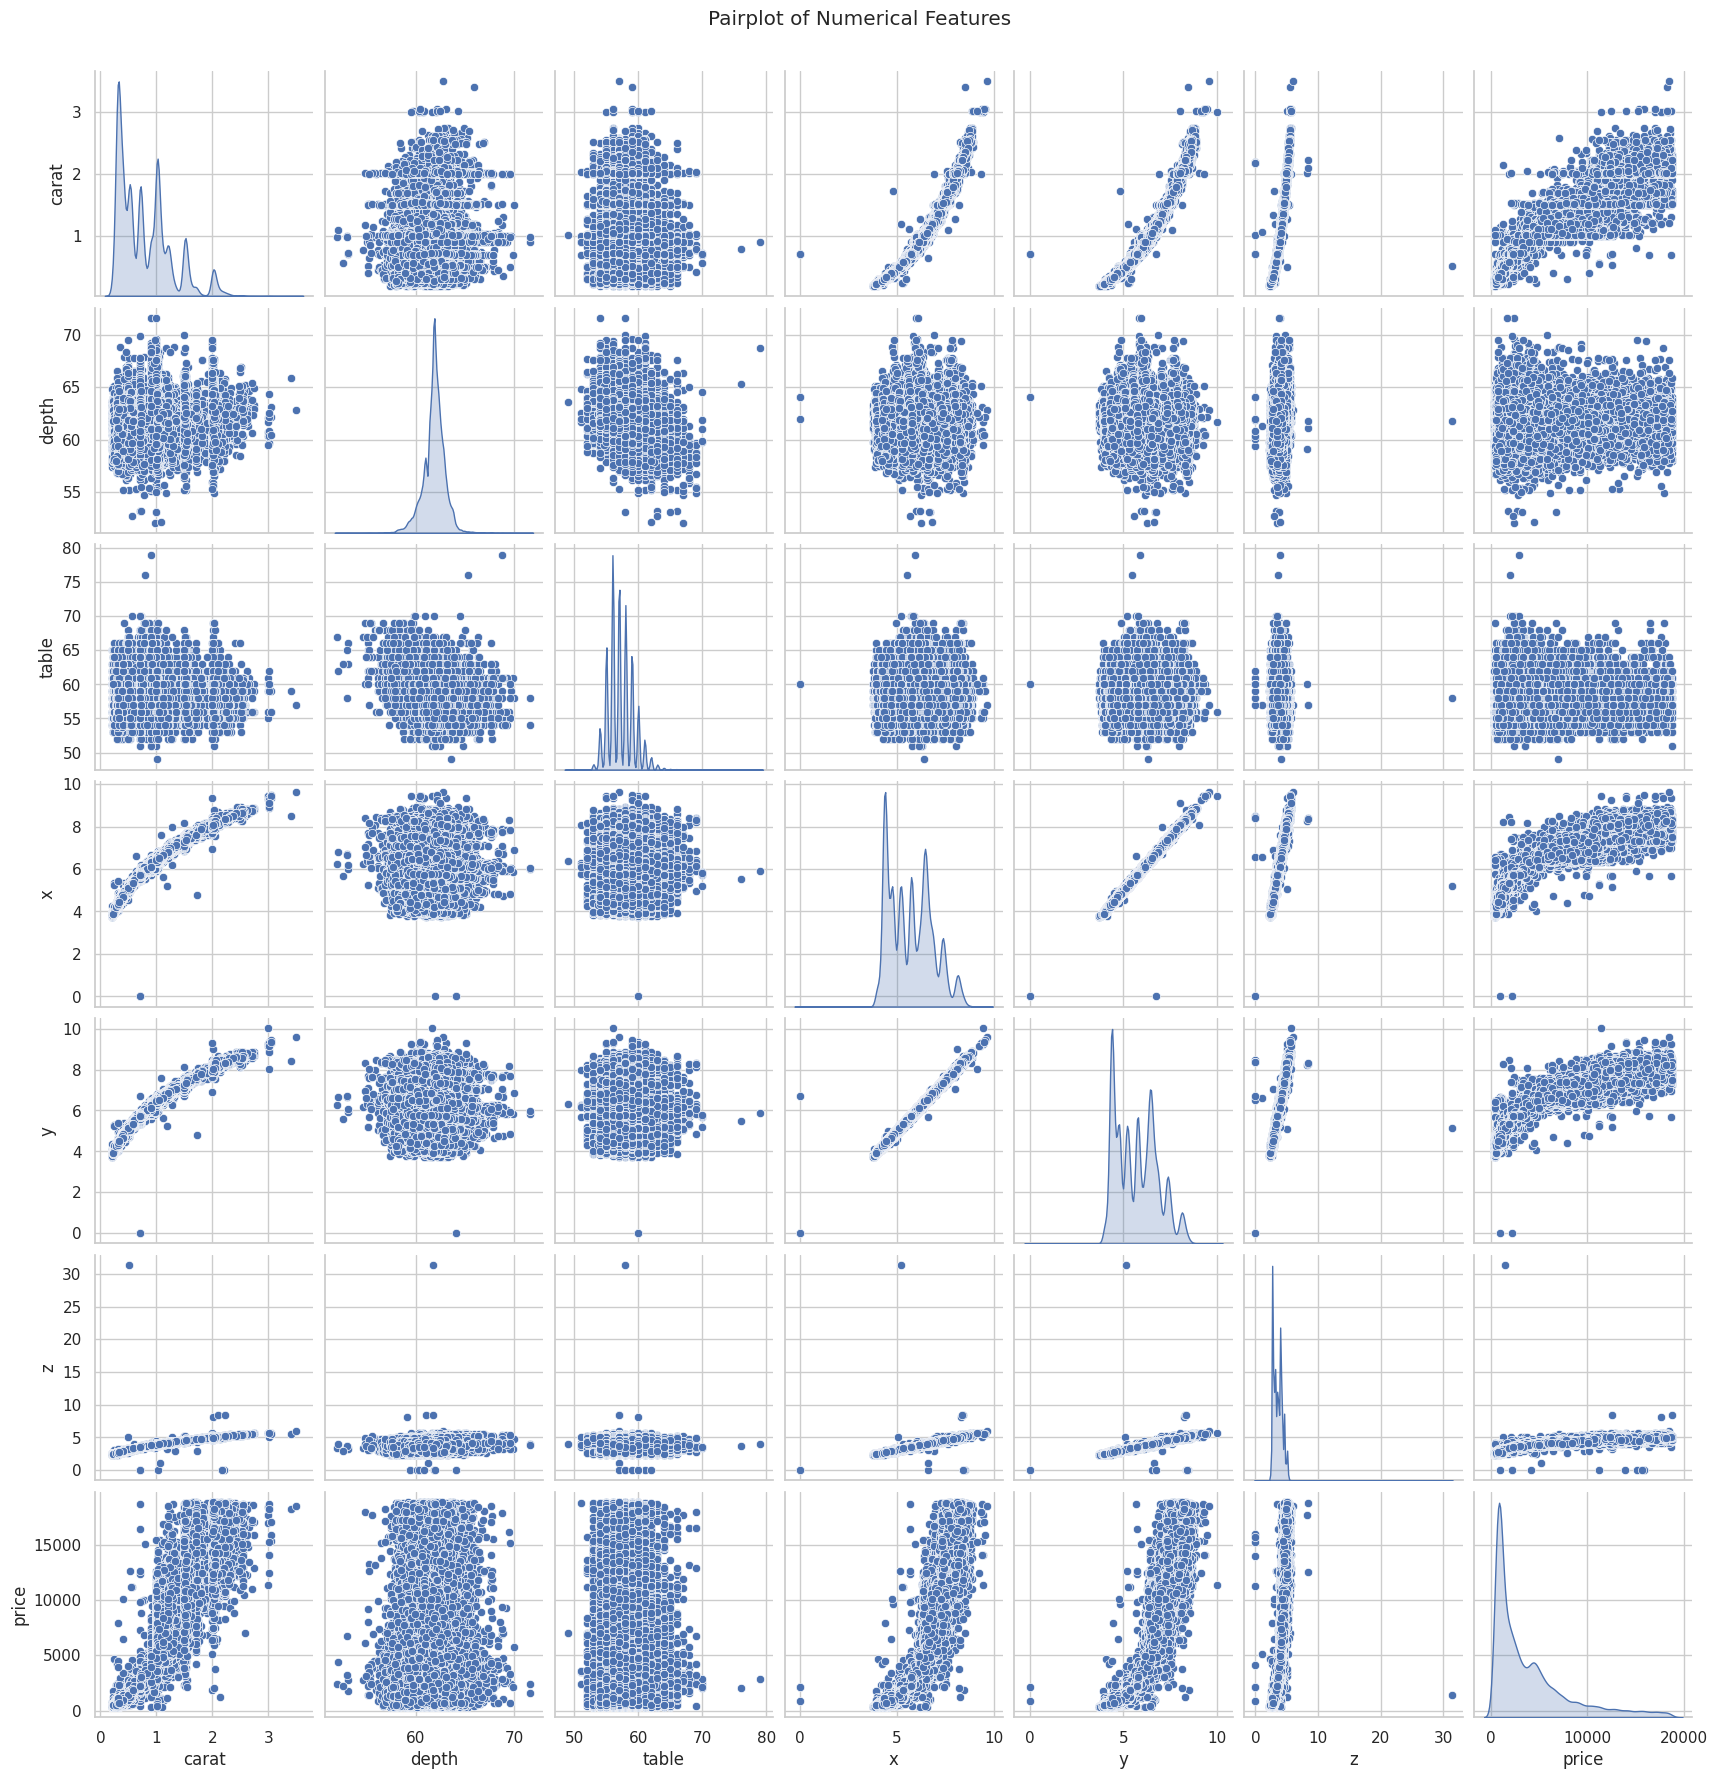

In [ ]:
# Bivariate Analysis: Pairplot
sns.pairplot(df[numerical_columns], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


* The scatterplot between carat and price shows a clear upward trend, indicating that as the carat size of a diamond increases, its price tends to rise. This suggests a strong positive relationship between these two variables.

* The features x, y, and z (representing dimensions of the diamond) show a strong linear relationship among themselves. This is expected as the dimensions are interrelated and contribute to the overall volume of the diamond.

* The scatterplots of variables depth and table appear more dispersed without a clear trend. This indicates that these variables may have less direct influence on diamond price compared to features like carat.List item




**Outlier Analysis**

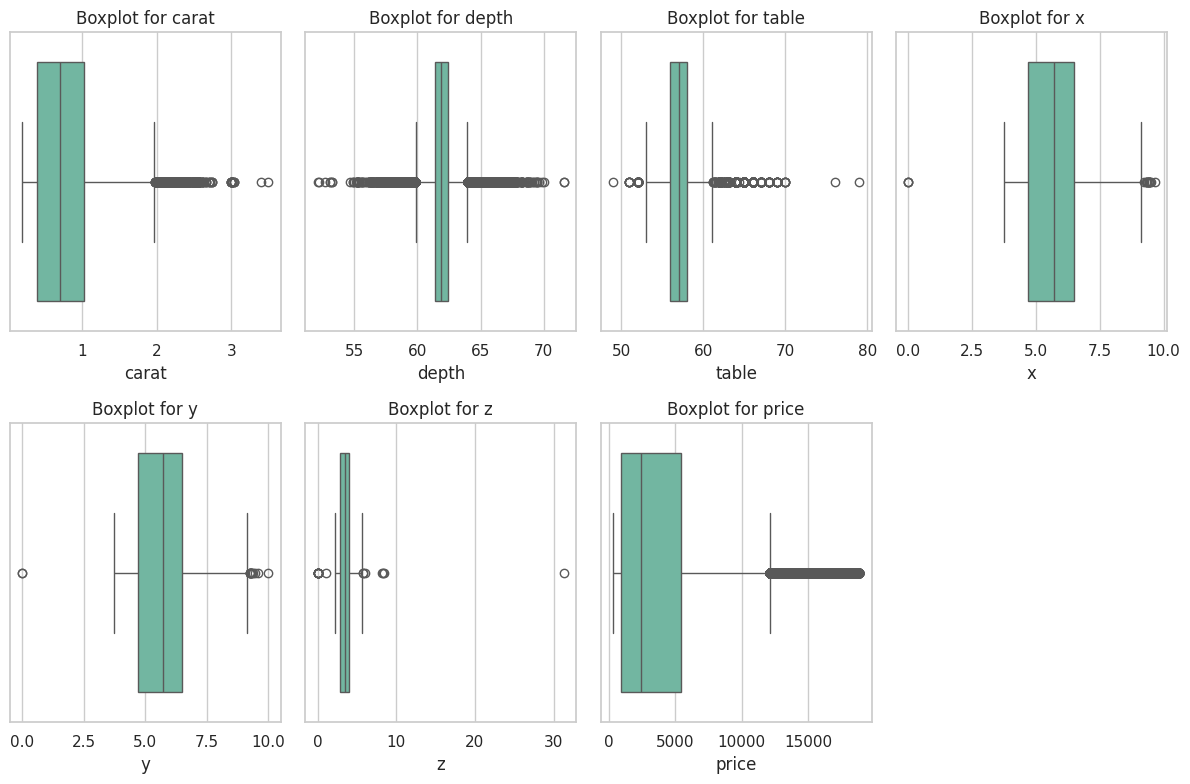

In [ ]:
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

# Create a boxplot for each numerical column to check for outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)  # Adjust subplot layout if necessary
    sns.boxplot(x=df[column], palette='Set2')  # You can change 'Set2' to any color palette you like
    plt.title(f"Boxplot for {column}")
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

In [ ]:
# Function to cap outliers using the IQR method and display replaced values
def cap_outliers_with_logging(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nOutliers in column '{column}':")
    print(outliers[column])

    # Replace the outliers with bounds
    data[column] = np.where(data[column] < lower_bound, lower_bound,
                            np.where(data[column] > upper_bound, upper_bound, data[column]))

    # Log replacements
    replacements = outliers[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound)
    print(f"\nReplacements for column '{column}':")
    print(replacements)

    return data

# Apply capping to numerical columns and log outliers
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
df_capped = df.copy()  # Create a copy of the dataframe

for col in numerical_columns:
    print(f"\nProcessing column: {col}")
    df_capped = cap_outliers_with_logging(df_capped, col)


Processing column: carat

Outliers in column 'carat':
1         2.03
81        2.02
88        2.01
110       2.00
138       2.22
          ... 
193278    2.01
193279    2.02
193287    2.04
193325    2.00
193377    2.01
Name: carat, Length: 7653, dtype: float64

Replacements for column 'carat':
1         1.975
81        1.975
88        1.975
110       1.975
138       1.975
          ...  
193278    1.975
193279    1.975
193287    1.975
193325    1.975
193377    1.975
Name: carat, Length: 7653, dtype: float64

Processing column: depth

Outliers in column 'depth':
31        66.8
49        65.4
102       58.8
133       59.3
136       65.3
          ... 
193516    59.6
193541    64.6
193545    59.7
193554    58.9
193562    59.7
Name: depth, Length: 12174, dtype: float64

Replacements for column 'depth':
31        63.9
49        63.9
102       59.9
133       59.9
136       63.9
          ... 
193516    59.9
193541    63.9
193545    59.9
193554    59.9
193562    59.9
Name: depth, Length: 121

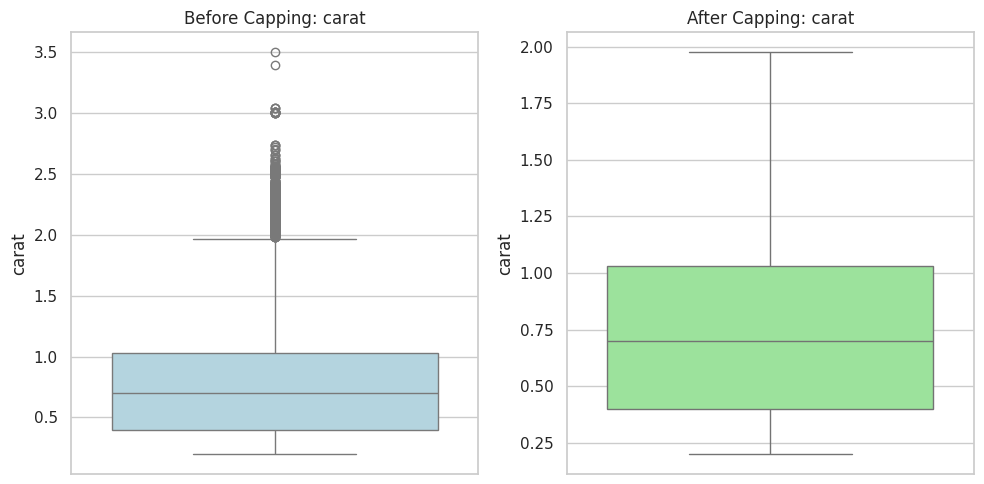

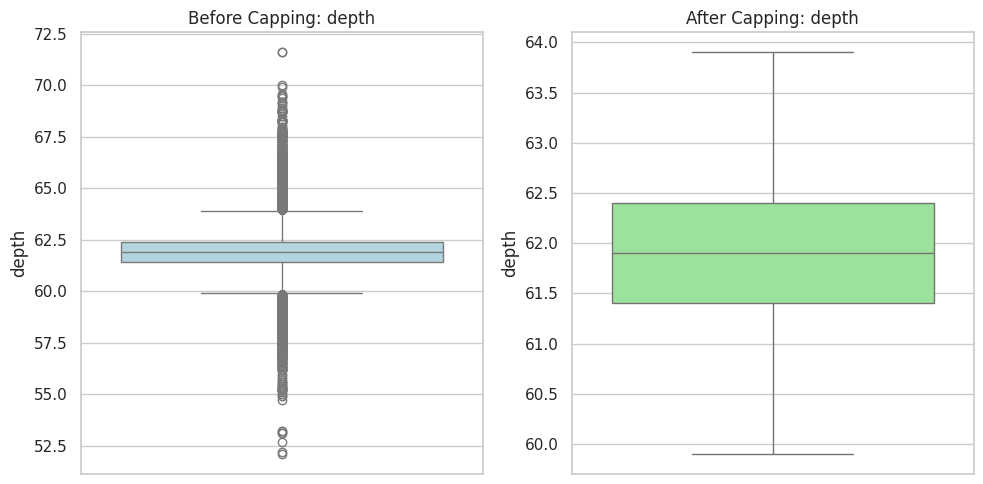

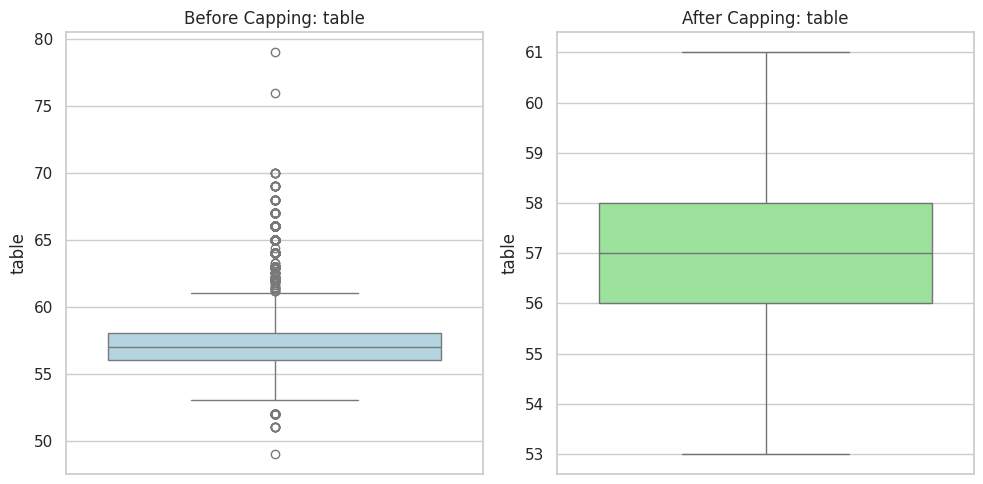

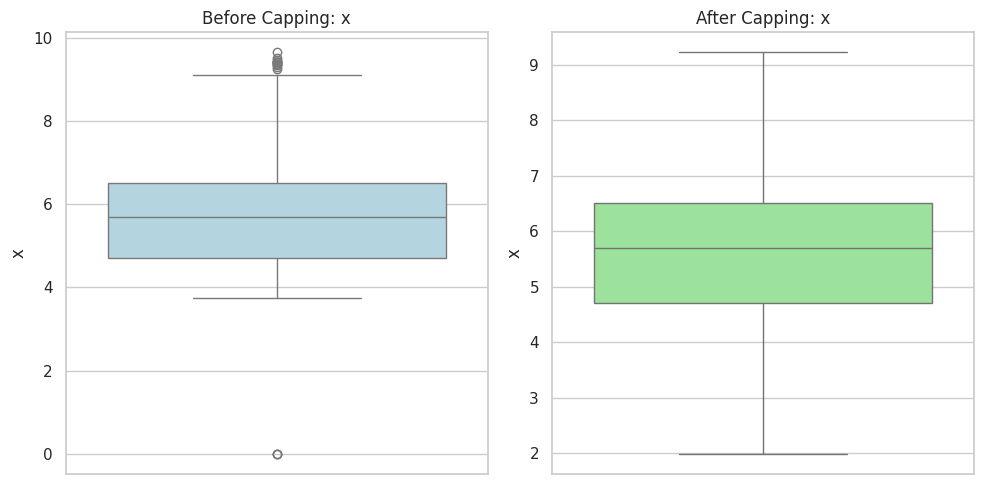

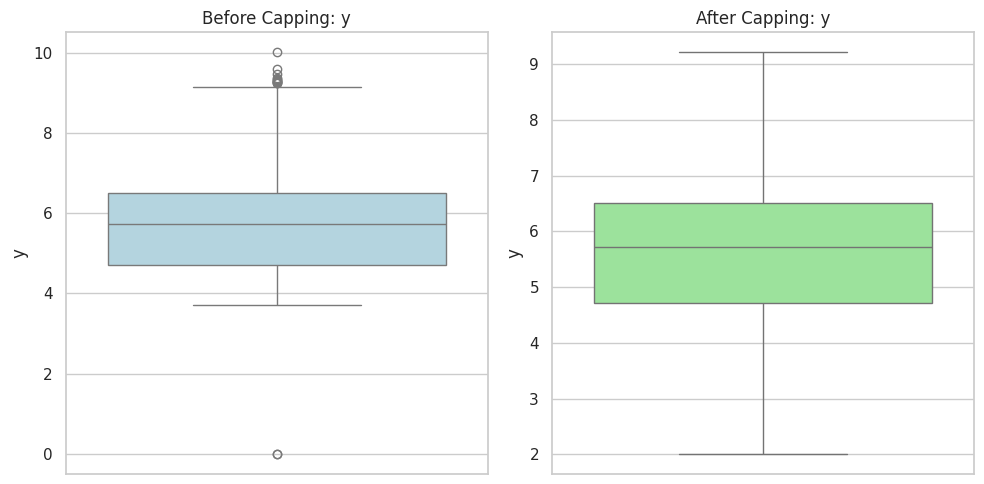

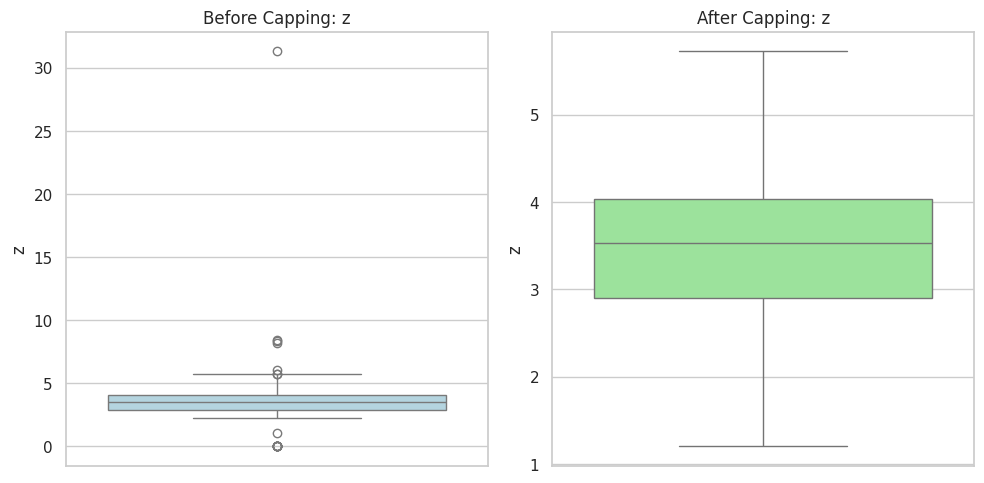

In [ ]:
# Visualization: Boxplots before and after capping
for col in numerical_columns:
    plt.figure(figsize=(10, 5))

    # Before capping
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Before Capping: {col}")

    # After capping
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_capped[col], color='lightgreen')
    plt.title(f"After Capping: {col}")

    plt.tight_layout()
    plt.show()

Encoding Categorical Values

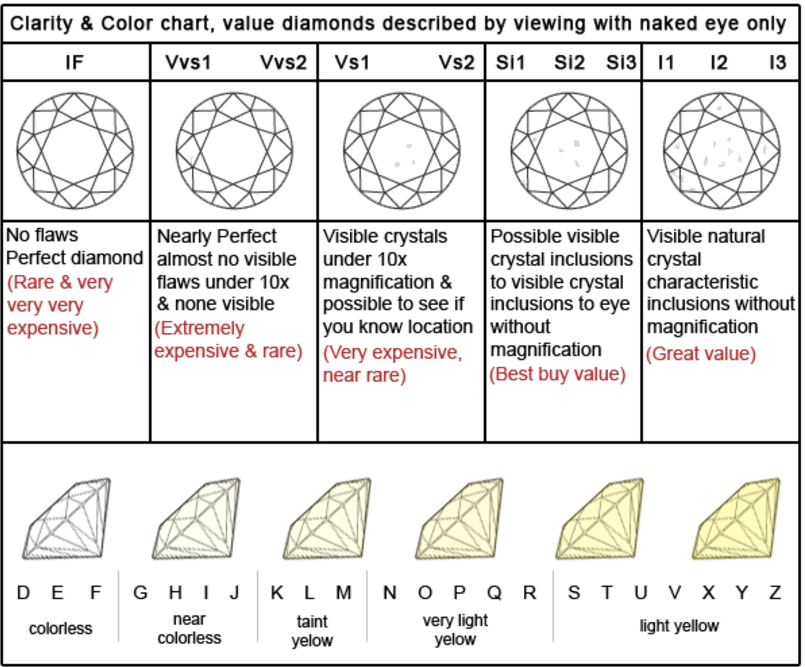

In [ ]:
# encoding
df_capped["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
df_capped["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [ ]:
df_capped["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [ ]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":7 ,"E":6 ,"F":5 , "G":4 ,"H":3 , "I":2, "J":1}

In [ ]:
df_capped["cut"]=df_capped["cut"].map(cut_map)
df_capped["clarity"]=df_capped["clarity"].map(clarity_map)
df_capped["color"]=df_capped["color"].map(color_map)

**Feature Construction**

In [ ]:
# 3. Creating New Features
# Example 1: Price per carat (price-to-carat ratio) #compares diamonds of different sizes
df_capped['price_per_carat'] = df_capped['price'] / df_capped['carat']

# Example 2: Diamond Volume = x * y * z (this gives the rough volume of the diamond)
df_capped['diamond_volume'] = df_capped['x'] * df_capped['y'] * df_capped['z']

# Example 3: Surface Area (approximation) = 2 * (x * y + y * z + z * x)
df_capped['diamond_surface_area'] = 2 * (df_capped['x'] * df_capped['y'] + df_capped['y'] * df_capped['z'] + df_capped['z'] * df_capped['x'])

# Example 4: Depth-to-Table Ratio (depth and table are important for diamond cut quality)
df_capped['depth_table_ratio'] = df_capped['depth'] / df_capped['table']

In [ ]:
# Output the final engineered dataset
print(df_capped.head())

   id  carat  cut  color  clarity      depth  table     x     y     z  price  \
0   0  1.520    4      5        4  62.200000   58.0  7.27  7.33  4.55  13619   
1   1  1.975    3      1        2  62.000000   58.0  8.06  8.12  5.05  13387   
2   2  0.700    5      4        5  61.839086   57.0  5.69  5.73  3.50   2772   
3   3  0.320    5      4        5  61.600000   56.0  4.38  4.41  2.71    666   
4   4  1.700    4      4        4  62.600000   59.0  7.65  7.61  4.77  14453   

   price_per_carat  diamond_volume  diamond_surface_area  depth_table_ratio  
0      8959.868421      242.465405              239.4382           1.072414  
1      6778.227848      330.508360              294.3124           1.068966  
2      3960.000000      114.112950              145.1474           1.084896  
3      2081.250000       52.345818               86.2734           1.100000  
4      8501.764706      277.692705              262.0134           1.061017  


In [ ]:
columns_to_drop = ["carat", "x", "y", "z", "depth", "table"]
df_capped.drop(labels=columns_to_drop, axis=1, inplace=True)

In [ ]:
df_capped.head()

,cut,color,clarity,price,price_per_carat,diamond_volume,diamond_surface_area,depth_table_ratio
0,4,5,4,13619,8959.868421,242.465405,239.4382,1.072414
1,3,1,2,13387,6778.227848,330.508360,294.3124,1.068966
2,5,4,5,2772,3960.000000,114.112950,145.1474,1.084896
3,5,4,5,666,2081.250000,52.345818,86.2734,1.100000
4,4,4,4,14453,8501.764706,277.692705,262.0134,1.061017


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
import xgboost as xgb

In [ ]:
from sklearn.preprocessing import StandardScaler
# Assuming your data is in a DataFrame 'df' and the target variable is 'price'
X_capped = df_capped.drop(columns=['price'])  # Features
y_capped = df_capped['price']  # Target variable (price)

# Identify numerical columns for scaling
numerical_columns = ['price_per_carat', 'diamond_volume',
                     'diamond_surface_area', 'depth_table_ratio']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_capped[numerical_columns] = scaler.fit_transform(X_capped[numerical_columns])

# Verify the scaled data
print("Scaled training data (first 5 rows):\n", X_capped.head())

# Split the data into 80% training and 20% testing
X_train_capped , X_test_capped , y_train_capped , y_test_capped = train_test_split(X_capped , y_capped, test_size=0.2, random_state=42)

# Optionally, check the shape of the split data
print("Training data shape:", X_train_capped.shape)
print("Testing data shape:", X_test_capped.shape)


Scaled training data (first 5 rows):
    cut  color  clarity  price_per_carat  diamond_volume  diamond_surface_area  \
0    4      5        4         2.449765        1.520340              1.494148   
1    3      1        2         1.359852        2.697666              2.428329   
2    5      4        5        -0.048090       -0.196012             -0.111064   
3    5      4        5        -0.986684       -1.021973             -1.113338   
4    4      4        4         2.220904        1.991406              1.878469   

   depth_table_ratio  
0          -0.256462  
1          -0.341404  
2           0.051022  
3           0.423077  
4          -0.537203  
Training data shape: (154858, 7)
Testing data shape: (38715, 7)


**LINEAR REGRESSION MODEL**

In [ ]:
from sklearn.metrics import accuracy_score
# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_capped, y_train_capped)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_capped)

# Evaluate the model
mse_linear = mean_squared_error(y_test_capped, y_pred_linear) #mean squared error
rmse_linear = np.sqrt(mse_linear)  # Root Mean Squared Error
mae_linear = mean_absolute_error(y_test_capped, y_pred_linear)  # Mean Absolute Error
r2_linear = r2_score(y_test_capped, y_pred_linear)

print(f"Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"Mean Absolute Error (MAE): {mae_linear}")
print(f"R^2 Score: {r2_linear}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 215450.67024787512
Root Mean Squared Error (RMSE): 464.16664060213884
Mean Absolute Error (MAE): 289.4386470862424
R^2 Score: 0.986667306493585


In [ ]:
# Predict on the training set
y_train_pred_linear = linear_model.predict(X_train_capped)

# Evaluate the training R^2 score
r2_train_linear = r2_score(y_train_capped, y_train_pred_linear)

print(f"Linear Regression Model Training R^2 Score: {r2_train_linear}")

Linear Regression Model Training R^2 Score: 0.9874887338288326


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_model, X_capped, y_capped, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores.mean())

Cross-validated R^2 scores: 0.9873173918262872


**RANDOM FOREST REGRESSOR MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train_capped ,y_train_capped)

RandomForestRegressor()

In [ ]:
y_pred=rf.predict(X_test_capped)

In [ ]:
mae=mean_absolute_error(y_test_capped,y_pred)
mse=mean_squared_error(y_test_capped,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test_capped,y_pred)

print(f"Random Forest Regressor Model Evaluation:")
print("mean_absolute_error :",mae)
print("mean_squared_error :",mse)
print("root_mean_squared_error :",rmse)
print("r2_score :",r2)

Random Forest Regressor Model Evaluation:
mean_absolute_error : 31.374094278703346
mean_squared_error : 6124.590766250807
root_mean_squared_error : 78.25976467030046
r2_score : 0.9996209930957992


In [ ]:
# Predict on the training set
y_train_pred_rf = rf.predict(X_train_capped)

# Evaluate the training R^2 score
r2_train_rf = r2_score(y_train_capped, y_train_pred_rf)

print(f"Random Forest Regressor Model Training R^2 Score: {r2_train_rf}")

Random Forest Regressor Model Training R^2 Score: 0.9999332880298226


**DECISION TREE REGRESSOR MODEL**

In [ ]:
# Initialize the model
dtr_model = DecisionTreeRegressor()

# Train the model
dtr_model.fit(X_train_capped, y_train_capped)

# Predict on the test set
y_pred_dtr = dtr_model.predict(X_test_capped)

# Evaluate the model
mse_dtr = mean_squared_error(y_test_capped, y_pred_dtr) #mean squared error
rmse_dtr = np.sqrt(mse_dtr)  # Root Mean Squared Error
mae_dtr = mean_absolute_error(y_test_capped, y_pred_dtr)  # Mean Absolute Error
r2_dtr = r2_score(y_test_capped, y_pred_dtr)

print(f"Decision Tree Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_dtr}")
print(f"Root Mean Squared Error (RMSE): {rmse_dtr}")
print(f"Mean Absolute Error (MAE): {mae_dtr}")
print(f"R^2 Score: {r2_dtr}")

Decision Tree Regressor Model Evaluation:
Mean Squared Error (MSE): 13459.084308407593
Root Mean Squared Error (RMSE): 116.01329367105993
Mean Absolute Error (MAE): 41.046751904946404
R^2 Score: 0.9991671140045443


In [ ]:
# Predict on the training set
y_train_pred_dtr = dtr_model.predict(X_train_capped)

# Evaluate the training R^2 score
r2_train_dtr = r2_score(y_train_capped, y_train_pred_dtr)

print(f"Decision Tree Regressor Model Training R^2 Score: {r2_train_dtr}")

Decision Tree Regressor Model Training R^2 Score: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtr_model, X_capped, y_capped, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores.mean())

Cross-validated R^2 scores: 0.999178324796058


In [ ]:
from sklearn.model_selection import GridSearchCV

# 3. Hyperparameter Tuning to Prevent Overfitting
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt']
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_capped, y_train_capped)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# 4. Evaluate the Tuned Model
y_pred_tuned = best_model.predict(X_test_capped)

print("Tuned Model Performance:")
print("MSE:", mean_squared_error(y_test_capped, y_pred_tuned))
print("R^2 Score:", r2_score(y_test_capped, y_pred_tuned))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Tuned Model Performance:
MSE: 9246.781825077
R^2 Score: 0.9994277831308085


**XGBOOST MODEL**

In [ ]:
import xgboost as xgb

# Initialize XGBoost model (you can tune hyperparameters)
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=1000,             # Number of trees
    max_depth=6,                   # Depth of the trees
    learning_rate=0.05,            # Step size shrinking
    subsample=0.8,                 # Fraction of samples to be used for each tree
    colsample_bytree=0.8,          # Fraction of features to be used for each tree
    random_state=42                # For reproducibility
)

# Train the model
xgb_model.fit(X_train_capped, y_train_capped)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_capped)

# Evaluate the model
mse_xgb = mean_squared_error(y_test_capped, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test_capped, y_pred_xgb)
r2_xgb = r2_score(y_test_capped, y_pred_xgb)

# Print the results
print(f"XGBoost Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"R^2 Score: {r2_xgb}")


XGBoost Model Evaluation:
Mean Squared Error (MSE): 10879.533601789488
Root Mean Squared Error (RMSE): 104.30500276491769
Mean Absolute Error (MAE): 41.398210482798724
R^2 Score: 0.999326765537262


In [ ]:
# Predict on the training set
y_train_pred_xgb = xgb_model.predict(X_train_capped)

# Evaluate the training R^2 score
r2_train_xgb = r2_score(y_train_capped, y_train_pred_xgb)

print(f"XGBoost Model Training R^2 Score: {r2_train_xgb}")

XGBoost Model Training R^2 Score: 0.9997338056564331


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_capped, y_capped, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores.mean())

Cross-validated R^2 scores: 0.9992982506752014


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_capped, y_train_capped)

# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model found from GridSearchCV
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_xgb = best_model.predict(X_test_capped)

# Evaluate the model
mse_best_xgb = mean_squared_error(y_test_capped, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
mae_best_xgb = mean_absolute_error(y_test_capped, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test_capped, y_pred_best_xgb)

# Print results of the tuned model
print(f"Tuned XGBoost Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_best_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_xgb}")
print(f"Mean Absolute Error (MAE): {mae_best_xgb}")
print(f"R^2 Score: {r2_best_xgb}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Tuned XGBoost Model Evaluation:
Mean Squared Error (MSE): 10538.441853876022
Root Mean Squared Error (RMSE): 102.65691332723785
Mean Absolute Error (MAE): 42.31342296775237
R^2 Score: 0.9993478655815125


In [ ]:
# Importing Ridge and Lasso Regression models
from sklearn.linear_model import Ridge, Lasso

# Initialize the models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train the models
ridge_model.fit(X_train_capped , y_train_capped)
lasso_model.fit(X_train_capped , y_train_capped)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_capped)
y_pred_lasso = lasso_model.predict(X_test_capped)

# Evaluate the models
mse_ridge = mean_squared_error(y_test_capped, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)  # Root Mean Squared Error
mae_ridge = mean_absolute_error(y_test_capped, y_pred_ridge)  # Mean Absolute Error
r2_ridge = r2_score(y_test_capped , y_pred_ridge)

mse_lasso = mean_squared_error(y_test_capped , y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)  # Root Mean Squared Error
mae_lasso = mean_absolute_error(y_test_capped, y_pred_lasso)  # Mean Absolute Error
r2_lasso = r2_score(y_test_capped , y_pred_lasso)

# Print evaluation metrics for Ridge Regression
print(f"Ridge Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R^2 Score: {r2_ridge}")
print("-" * 50)  # Separator line for clarity

# Print evaluation metrics for Lasso Regression
print(f"Lasso Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"R^2 Score: {r2_lasso}")
print("-" * 50)  # Separator line for clarity


Ridge Regression Model Evaluation:
Mean Squared Error (MSE): 215450.9832770586
Root Mean Squared Error (RMSE): 464.16697779684694
Mean Absolute Error (MAE): 289.55808793617064
R^2 Score: 0.9866672871224587
--------------------------------------------------
Lasso Regression Model Evaluation:
Mean Squared Error (MSE): 215434.0621617627
Root Mean Squared Error (RMSE): 464.1487500379191
Mean Absolute Error (MAE): 289.64277049270345
R^2 Score: 0.9866683342486698
--------------------------------------------------


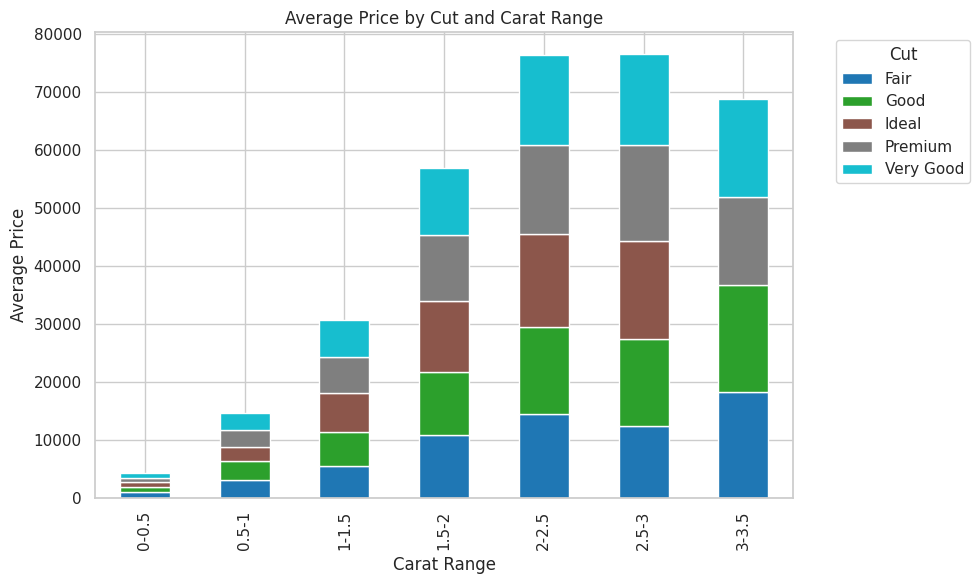

In [ ]:

# Bin carat into ranges
df['carat_bin'] = pd.cut(df['carat'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5], labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5'])

# Aggregate: Mean price by cut and carat bin
grouped = df.groupby(['carat_bin', 'cut'])['price'].mean().unstack()

# Stacked bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
plt.title('Average Price by Cut and Carat Range')
plt.ylabel('Average Price')
plt.xlabel('Carat Range')
plt.legend(title='Cut', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()